In [1]:
"""
Relevant packages that were actually used in this project.
"""
import numpy as np 
import pandas as pd 
import seaborn as sns 
sns.set() 
sns.set_context('talk') 
import warnings 
warnings.filterwarnings('ignore')
"""
Packages that were imported just in case, but ultimately
were not used at any point for one reason or another.
"""
%matplotlib inline 
import matplotlib.pyplot as plt 
import patsy 
import statsmodels.api as sm 
import scipy.stats as stats 
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
"""
Loading the downloaded .csv file of the specified year of interest
into a variable as a DataFrame object for analysis.
"""
df = pd.read_csv('2019 NSCHTopical_CAHMI DRC.csv')

In [3]:
"""
Filter out the data to only the subset of children WITH ADHD
[K2Q31B]: whether a child has ADHD or not
1: has ADHD
2: does not have ADHD
"""
df = df[df['K2Q31B'] == 1]

In [4]:
"""
Filter out data that has missing data in below column.
Numbers 90-99 are not usuable in analysis.
[K2Q31C]: describes severity of ADHD symptoms
1: mild
2: moderate
3: severe
"""
df = df[df['K2Q31C'].isin([1, 2, 3])]

In [5]:
"""
Filter out data that has missing data in below column.
Numbers 90-99 are not usuable in analysis.
PHYSACTIV: number of days kids have physical activity in a week
1: No physical activity
2: 1-3 days a week
3: 4-6 days a week
4: every day
"""
df = df[df['PHYSACTIV'].isin([1, 2, 3, 4])]

In [6]:
"""
Filter out data that has missing data in below column.
Numbers 90-99 are not usuable in analysis.
ADDTREAT: if treated for symptoms
1: Yes, given treatment
2: No, not given treatment
"""
df = df[df['ADDTREAT'].isin([1, 2])]

In [7]:
"""
We have a subset of data of children with ADHD and no missing values
for these following columns. Some values will be changed to be
better understood at a glance and all the columns below will be 
renamed from their codes into a simpler name.

SC_AGE_YEARS: age of child
SC_SEX: sex of child
1: (M)ale
2: (F)emale
K2Q1C: severity of symptoms
PHYSACTIV: days of physical activity in a week
ADDTREAT: if given treatment for symptoms (changed to Boolean)
"""
df = df[['SC_AGE_YEARS', 'SC_SEX', 'K2Q31C', 'PHYSACTIV', 'ADDTREAT']]
df.columns = ['age', 'sex','severity', 'exercise', 'treatment']
df['sex'] = df['sex'].replace(1, 'M')
df['sex'] = df['sex'].replace(2, 'F')
df['treatment'] = df['treatment'].replace(1, True)
df['treatment'] = df['treatment'].replace(2, False)

In [8]:
"""
Total count by sex in the dataset to calculate proportions.
Note: 'sex' will be the first column to group categories by
to aggregate so that it will be consistent grouping for
all subsequent charts: all Female rows followed by all Male rows
"""
total_fem = 823
total_male = 1775

,sex,severity,proportion
0,F,1,0.450790
1,F,2,0.473876
2,F,3,0.075334
3,M,1,0.419155
4,M,2,0.458592
5,M,3,0.122254


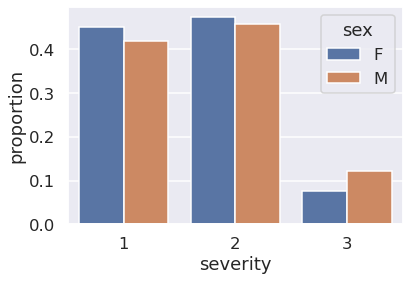

In [9]:
"""
All comparisons will be by PROPORTION to account for 
the disparity between the number of males and the number
of females in the dataset.
"""
sev_by_prop = df[['severity','sex', 'age']].groupby(['sex', 'severity']).count().reset_index()
sev_by_prop = sev_by_prop.rename(columns={'age': 'count'})
sev_by_prop = pd.DataFrame().assign(
sex = sev_by_prop.get('sex'),
severity  = sev_by_prop.get('severity'),
proportion = sev_by_prop.get('count') / pd.Series([total_fem]*3 + [total_male]*3)
) 
sns.barplot(data=sev_by_prop, x='severity', y='proportion', hue='sex')
sev_by_prop

<AxesSubplot:xlabel='exercise', ylabel='proportion'>

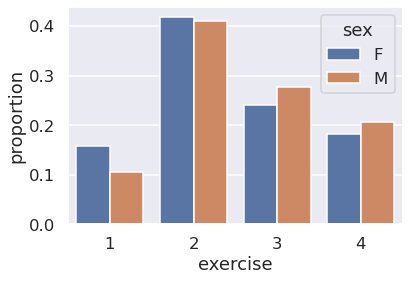

In [10]:
"""
Looking at amount of exercise in a week by sex.
"""
ex_by_prop = df.groupby(['sex', 'exercise']).count().reset_index()
ex_by_prop = ex_by_prop.rename(columns={'age': 'count'})
ex_by_prop = pd.DataFrame().assign(
sex = ex_by_prop.get('sex'),
exercise = ex_by_prop.get('exercise'),
proportion = ex_by_prop.get('count') / pd.Series([total_fem]*4 + [total_male]*4)
)
ex_by_prop = sns.barplot(data=ex_by_prop, x='exercise', y='proportion', hue='sex')
ex_by_prop

<AxesSubplot:xlabel='severity', ylabel='proportion'>

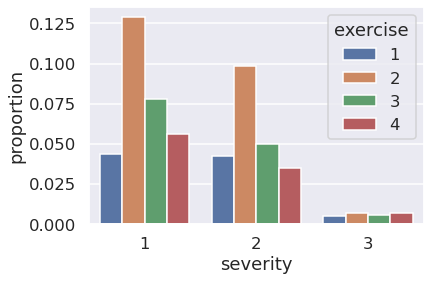

In [13]:
"""
How much Females exercise based on severity 
with NO treatment vs WITH treatment (next cell)
"""
fem_treat_false = df[(df['sex'] == 'F') & (df['treatment'] == False)]
fem_treat_false = fem_treat_false[['severity', 'exercise', 'age']]
fem_treat_false = fem_treat_false.groupby(['severity','exercise']).count().reset_index()
fem_treat_false = pd.DataFrame().assign(
severity = fem_treat_false.get('severity'),
exercise = fem_treat_false.get('exercise'),
proportion = fem_treat_false.get('age') / pd.Series([total_fem]*12)
)
fem_treat_false
sns.barplot(data=fem_treat_false, x='severity', y='proportion', hue='exercise')

<AxesSubplot:xlabel='severity', ylabel='proportion'>

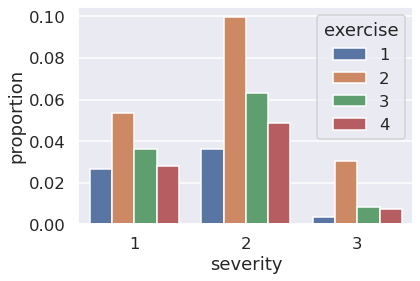

In [14]:
fem_treat_true = df[(df['sex'] == 'F') & (df['treatment'] == True)]
fem_treat_true = fem_treat_true[['severity', 'exercise', 'age']]
fem_treat_true = fem_treat_true.groupby(['severity','exercise']).count().reset_index()
fem_treat_true = pd.DataFrame().assign(
severity = fem_treat_true.get('severity'),
exercise = fem_treat_true.get('exercise'),
proportion = fem_treat_true.get('age') / pd.Series([total_fem]*12)
)
fem_treat_true
sns.barplot(data=fem_treat_true, x='severity', y='proportion', hue='exercise')

<AxesSubplot:xlabel='severity', ylabel='proportion'>

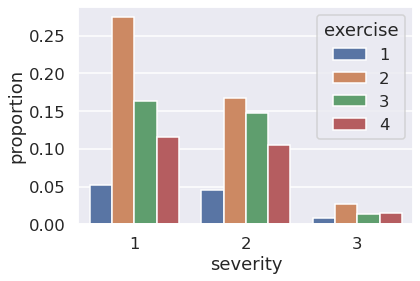

In [15]:
"""
How much Males exercise based on severity 
with NO treatment vs WITH treatment (next cell)
"""
male_treat_false = df[(df['sex'] == 'M') & (df['treatment'] == False)]
male_treat_false = male_treat_false[['severity', 'exercise', 'age']]
male_treat_false = male_treat_false.groupby(['severity','exercise']).count().reset_index()
male_treat_false = pd.DataFrame().assign(
severity = male_treat_false.get('severity'),
exercise = male_treat_false.get('exercise'),
proportion = male_treat_false.get('age') / pd.Series([total_fem]*12)
)
male_treat_false
sns.barplot(data=male_treat_false, x='severity', y='proportion', hue='exercise')

<AxesSubplot:xlabel='severity', ylabel='proportion'>

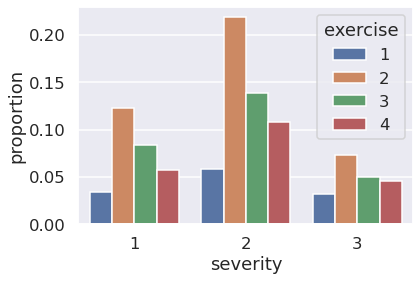

In [16]:
male_treat_true = df[(df['sex'] == 'M') & (df['treatment'] == True)]
male_treat_true = male_treat_true[['severity', 'exercise', 'age']]
male_treat_true = male_treat_true.groupby(['severity','exercise']).count().reset_index()
male_treat_true = pd.DataFrame().assign(
severity = male_treat_true.get('severity'),
exercise = male_treat_true.get('exercise'),
proportion = male_treat_true.get('age') / pd.Series([total_fem]*12)
)
male_treat_true
sns.barplot(data=male_treat_true, x='severity', y='proportion', hue='exercise')